# models comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"26_RL_agent_TDlearn_output_model_comparison_softmax"
os.makedirs(output_dir, exist_ok=True)

# first half train second half test
file_see_colors = "16_RL_agent_TDlearn_output_softmax/models_evaluation.csv"
file_see_numbers = "17_RL_agent_TDlearn_output_softmax/models_evaluation.csv"
file_see_colors_and_numbers = "18_RL_agent_TDlearn_output_softmax/models_evaluation.csv"


# second half train first half test
file_see_colors_2 = "21_RL_agent_TDlearn_output_softmax/models_evaluation.csv"
file_see_numbers_2 = "22_RL_agent_TDlearn_output_softmax/models_evaluation.csv"
file_see_colors_and_numbers_2 = "23_RL_agent_TDlearn_output_softmax/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)


df_see_colors_2 = pd.read_csv(file_see_colors_2)
df_see_numbers_2 = pd.read_csv(file_see_numbers_2)
df_see_colors_and_numbers_2 = pd.read_csv(file_see_colors_and_numbers_2)

# accuracies

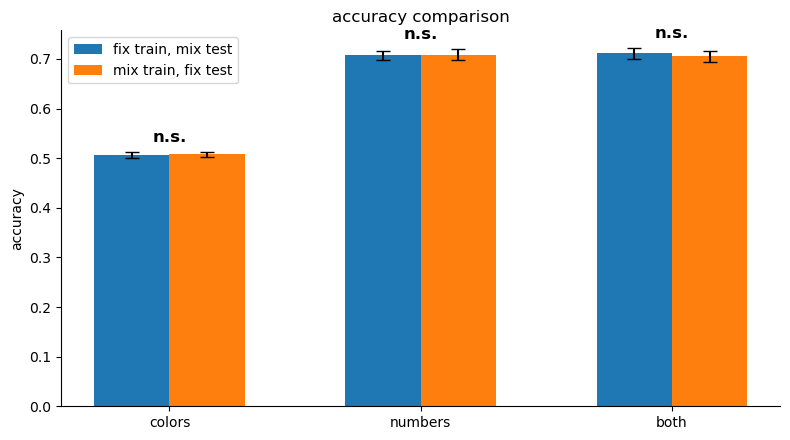

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

# Extract accuracy values
acc_see_colors = df_see_colors["accuracy"]
acc_see_numbers = df_see_numbers["accuracy"]
acc_sees_colors_and_numbers = df_see_colors_and_numbers["accuracy"]

acc_see_colors_2 = df_see_colors_2["accuracy"]
acc_see_numbers_2 = df_see_numbers_2["accuracy"]
acc_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["accuracy"]

# Compute means
means = [
    np.mean(acc_see_colors), np.mean(acc_see_colors_2),
    np.mean(acc_see_numbers), np.mean(acc_see_numbers_2),
    np.mean(acc_sees_colors_and_numbers), np.mean(acc_sees_colors_and_numbers_2)
]

# Compute standard error of the mean (SEM)
sems = [
    stats.sem(acc_see_colors), stats.sem(acc_see_colors_2),
    stats.sem(acc_see_numbers), stats.sem(acc_see_numbers_2),
    stats.sem(acc_sees_colors_and_numbers), stats.sem(acc_sees_colors_and_numbers_2)
]

categories = ["colors", "numbers", "both"]
x = np.arange(len(categories))
width = 0.3

# Perform paired t-tests
p_values = [
    stats.ttest_rel(acc_see_colors, acc_see_colors_2).pvalue,
    stats.ttest_rel(acc_see_numbers, acc_see_numbers_2).pvalue,
    stats.ttest_rel(acc_sees_colors_and_numbers, acc_sees_colors_and_numbers_2).pvalue
]

# Significance labels
sig_labels = ["*" if p < 0.05 else "n.s." for p in p_values]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width/2, means[::2], yerr=sems[::2], width=width, label="fix train, mix test", capsize=5)
ax.bar(x + width/2, means[1::2], yerr=sems[1::2], width=width, label="mix train, fix test", capsize=5)

# Add significance annotations
for i in range(len(categories)):
    max_height = max(means[2*i] + sems[2*i], means[2*i+1] + sems[2*i+1])
    ax.text(x[i], max_height + 0.02, sig_labels[i], ha='center', fontsize=12, fontweight='bold')

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel("accuracy")
ax.set_title("accuracy comparison")
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout(rect=[0, 0, 1, 0.9])

filename = os.path.join(output_dir, "models_evaluation_comparison_accuracies.pdf")
plt.savefig(filename, format='pdf')

plt.show()


# the plots below do not mean anything!!

# BIC and R2 calculations

In [4]:
# bic_see_colors = df_see_colors["BIC"]
# bic_see_numbers = df_see_numbers["BIC"]
# bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]


# bic_see_colors_2 = df_see_colors_2["BIC"]
# bic_see_numbers_2 = df_see_numbers_2["BIC"]
# bic_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["BIC"]



# aic_see_colors = df_see_colors["AIC"]
# aic_see_numbers = df_see_numbers["AIC"]
# aic_sees_colors_and_numbers = df_see_colors_and_numbers["AIC"]


# aic_see_colors_2 = df_see_colors_2["AIC"]
# aic_see_numbers_2 = df_see_numbers_2["AIC"]
# aic_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["AIC"]


# mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
# mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
# mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]


# mcFadden_r2_see_colors_2 = df_see_colors_2["mcFadden_r2"]
# mcFadden_r2_see_numbers_2 = df_see_numbers_2["mcFadden_r2"]
# mcFadden_r2_sees_colors_and_numbers_2 = df_see_colors_and_numbers_2["mcFadden_r2"]



# delta_bic_colors_fix_train_mix_test = bic_see_colors - bic_see_colors_2
# delta_bic_numbers_fix_train_mix_test = bic_see_numbers - bic_see_numbers_2
# delta_bic_colors_and_numbers_fix_train_mix_test = bic_sees_colors_and_numbers - bic_sees_colors_and_numbers_2


# delta_aic_colors_fix_train_mix_test = aic_see_colors - aic_see_colors_2
# delta_aic_numbers_fix_train_mix_test = aic_see_numbers - aic_see_numbers_2
# delta_aic_colors_and_numbers_fix_train_mix_test = aic_sees_colors_and_numbers - aic_sees_colors_and_numbers_2


# delta_mcFadden_r2_colors_fix_train_mix_test = mcFadden_r2_see_colors - mcFadden_r2_see_colors_2
# delta_mcFadden_r2_numbers_fix_train_mix_test = mcFadden_r2_see_numbers - mcFadden_r2_see_numbers_2
# delta_mcFadden_r2_colors_and_numbers_fix_train_mix_test = mcFadden_r2_sees_colors_and_numbers - mcFadden_r2_sees_colors_and_numbers_2



# BIC and R2 calculations visualizations

In [5]:
# fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# bic_deltas = [delta_bic_colors_fix_train_mix_test, delta_bic_numbers_fix_train_mix_test, delta_bic_colors_and_numbers_fix_train_mix_test]
# aic_deltas = [delta_aic_colors_fix_train_mix_test, delta_aic_numbers_fix_train_mix_test, delta_aic_colors_and_numbers_fix_train_mix_test]
# mcFadden_r2_deltas = [delta_mcFadden_r2_colors_fix_train_mix_test, delta_mcFadden_r2_numbers_fix_train_mix_test, delta_mcFadden_r2_colors_and_numbers_fix_train_mix_test]


# bic_labels = ["fix_train - mix_train (colors)", "fix_train - mix_train (numbers)", "fix_train - mix_train (both)"]
# mcFadden_labels = ["fix_train - mix_train (colors)", "fix_train - mix_train (numbers)", "fix_train - mix_train (both)"]


# # Plot BIC deltas
# box_bic = axs[0].boxplot(
#     bic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
#     showmeans=False, 
#     medianprops={'color': 'black', 'linewidth': 1.5}  
# )

# # Plot AIC deltas
# box_aic = axs[1].boxplot(
#     aic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
#     showmeans=False, 
#     medianprops={'color': 'black', 'linewidth': 1.5}  
# )

# # Plot McFadden R2 deltas
# box_mcFadden = axs[2].boxplot(
#     mcFadden_r2_deltas, vert=True, patch_artist=True, labels=mcFadden_labels, 
#     showmeans=False, 
#     medianprops={'color': 'black', 'linewidth': 1.5}  
# )

# # Set box colors
# for box in box_bic['boxes']:
#     box.set(facecolor='none')
# for box in box_aic['boxes']:
#     box.set(facecolor='none')
# for box in box_mcFadden['boxes']:
#     box.set(facecolor='none')

# scatter_colors = ['#8b0000', '#8b0000', '#8b0000']

# # Add scatter points for BIC deltas
# for i, delta in enumerate(bic_deltas):
#     axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
# axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
# axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

# # Add scatter points for AIC deltas
# for i, delta in enumerate(aic_deltas):
#     axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
# axs[1].set_title("ΔAIC", fontsize=16, fontweight='bold')
# axs[1].set_ylabel("ΔAIC", fontsize=14, fontweight='bold')

# # Add scatter points for McFadden R2 deltas
# for i, delta in enumerate(mcFadden_r2_deltas):
#     axs[2].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
# axs[2].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
# axs[2].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

# # Adjust axis properties
# for ax in axs:
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.tick_params(axis='y', labelsize=10)
#     for label in ax.get_xticklabels() + ax.get_yticklabels():
#         label.set_fontweight('bold')

# for ax in axs:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# fig.suptitle('comparing models', fontsize=18, fontweight='bold', y=0.85)

# plt.tight_layout(rect=[0, 0, 1, 0.9]) 

# filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2.pdf")
# plt.savefig(filename, format='pdf')
# print(f"Saved: {filename}")

# plt.show()
